In [50]:
### https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression
import numpy as np
import pandas as pd 
# classifier models:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# scaler
from sklearn.preprocessing import StandardScaler
# split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
# matplot libs
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
# to reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# scoring
from sklearn.metrics import fbeta_score, make_scorer, balanced_accuracy_score, jaccard_score, cohen_kappa_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
# to classification report
from sklearn.model_selection import learning_curve
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

Abaixo, funcoes de plots (ou tentativas rs) de plotar o gráfico. O último que postei era essa primeira funcao. Este comentário será apagado em 24 horas, boa noite.

In [51]:
def plotRed3d(train, point_labels, main_title='dimensionality reduction using PCA'):
    dicColors = {0:'magenta', 1:'blue'}    
    label_color = [dicColors[c] for c in point_labels]

    x_label = 'X'
    y_label = 'Y'
    z_label = 'Z'
    title = main_title 

    # creating figure
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection ="3d")

    # creating plot
    ax.scatter3D(train[:,0], train[:,1], train[:,2],c=label_color,alpha=0.8)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    ax.legend(labels=['healthy', 'with probable ddisease'])
    plt.grid(b=True)

    plt.suptitle(title, fontsize=20)  
    # plt.savefig(title + '.png')
    plt.show()

In [52]:
import warnings
# https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi
warnings.filterwarnings('ignore')

def print_val_scores(model, X_train, y_train, scoring=['f1_weighted','f1_macro','recall_weighted',
                                                       'precision_weighted'], 
                     cv=10):
    _,__,f1_w,f1_m,r,p=cross_validate(model, X_train, y_train, cv=cv,
                       scoring=scoring).items()
    mean_f1_w = f1_w[1].mean(); sd_f1_w = f1_w[1].std()
    mean_f1_m = f1_m[1].mean(); sd_f1_m = f1_m[1].std()
    mean_r = r[1].mean(); sd_r = r[1].std()
    mean_p = p[1].mean(); sd_p = p[1].std()
    
    print("Classification report for classifier {}:\nparameters:\n".format(model) +
          "{}\nmean: {}, std deviation: {}\n\n".format(f1_w[0],mean_f1_w,sd_f1_w) +
          "{}\nmean: {}, std deviation: {}\n\n".format(f1_m[0],mean_f1_m,sd_f1_m) +
          "{}\nmean: {}, std deviation: {}\n\n".format(r[0],mean_r,sd_r) +
          "{}\nmean: {}, std deviation: {}\n\n".format(p[0],mean_p,sd_p))

In [53]:
def print_val_custom_score (model, X_train, y_train, 
                            scoring='f1_macro', 
                            cv=10):
    print("Classification report for classifier {}:\nparameters:\n".format(model))
    
    myReturn=cross_validate(model,X_train,y_train,cv=cv,scoring=scoring)
    _,__,metric_score=myReturn
    metric_score=myReturn[metric_score]
    mean = np.mean(metric_score)
    sd = np.std(metric_score)
    print("{}\nmean: {}, std deviation: {}\n\n".format(scoring,mean,sd))

In [54]:
def print_metrics(clf, X, y, prediction):
    print(f"Classification report for classifier {clf}:\n"
          f"{metrics.classification_report(y, prediction)}\n")
    disp = metrics.plot_confusion_matrix(clf, X, y)
    disp.figure_.suptitle("Confusion Matrix")

In [55]:
data=pd.read_csv('heart_pred.csv')
# data.describe()

Retirando valores nulos e NaN

In [56]:
data=data.dropna()
# data_columns=list(data.columns.values.tolist())
data=data[data.notnull()]
data=data.reset_index()
data=data.sample(frac=0.1)
data.describe()

,index,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2127.065574,0.442623,49.827869,2.000000,0.527322,9.833333,0.035519,0.008197,0.341530,0.030055,238.762295,133.214481,82.796448,25.423443,75.016393,81.827869,0.193989
std,1196.596287,0.497377,8.573319,1.044227,0.499936,12.171248,0.185341,0.090287,0.474872,0.170971,48.428519,21.187449,11.620611,3.442110,11.946445,20.741604,0.395962
min,24.000000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.000000,94.000000,54.000000,16.920000,50.000000,50.000000,0.000000
25%,1089.500000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,117.500000,74.250000,23.062500,67.000000,72.000000,0.000000
50%,2180.000000,0.000000,49.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,233.500000,129.000000,82.000000,25.170000,75.000000,78.000000,0.000000
75%,3180.000000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,146.000000,90.000000,27.475000,80.750000,86.000000,0.000000
max,4210.000000,1.000000,68.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,464.000000,200.000000,120.000000,38.140000,130.000000,274.000000,1.000000


In [57]:
y=data["TenYearCHD"]
X=data.drop('TenYearCHD',axis=1)

In [58]:
# X = TSNE(n_components=2).fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
len(y_a[y_a == 0]) , len(y_a[y_a == 1])

(315, 315)

In [60]:
X_reduced=pca.transform(X)
smt = SMOTE()
X_a, y_a = smt.fit_sample(X_reduced, y)
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.20, random_state = 200)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

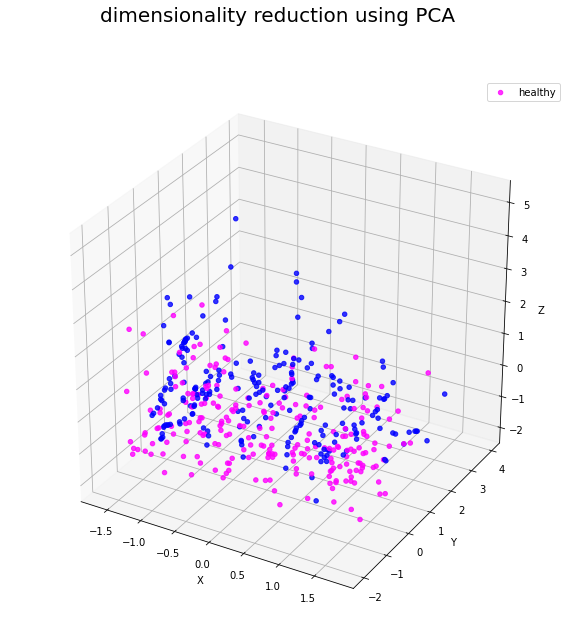

In [62]:
# print data distribution after dimentionality reduction
plotRed3d(X_train,y_train)

In [63]:
f_beta = make_scorer(fbeta_score, beta=4, average='weighted',zero_division=0)
# f_beta = make_scorer(fbeta_score, beta=2, average='weighted',zero_division=0)

In [64]:
# Criacao de grid para a Random Forest Classifier
max_depth = [int(x) for x in np.linspace(5, 100, num = 5)]
max_depth.append(None)

grid_rfc = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 11)],
    'criterion': ['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': max_depth,
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [65]:
clf_rfc = RandomForestClassifier()

In [66]:
#  Random search of parameters. Uses our shuffle selection cross validation, 
#  and search across "n_iter" different (shuffle) combinations, and use all available cores
rfc_search = RandomizedSearchCV(estimator = clf_rfc, param_distributions = grid_rfc, 
                               n_iter = 20, cv = 5, random_state=200, scoring=f_beta)

rfc_search.fit(X_train, y_train)
rfc_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 185}

In [67]:
rfc_search.best_score_

0.7243531661289329

In [68]:
best_clf_rfc = rfc_search.best_estimator_
# print_val_scores(best_clf_rfc, X_train, y_train)

In [69]:
print_val_custom_score(best_clf_rfc, X_train, y_train,f_beta)

Classification report for classifier RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=185,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
parameters:

make_scorer(fbeta_score, beta=4, average=weighted, zero_division=0)
mean: 0.7283626029472049, std deviation: 0.042270481589269965




SVM implementarion

In [70]:
clf_svm = make_pipeline(StandardScaler(), SVC())
# print(pprint(clf_svm.get_params() ))

In [71]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

C = [float(x) for x in np.linspace(start = 0.1, stop = 150.0, num = 10).astype(float)]
class_weight=['balanced', None]
kernel = ['linear', 'poly', 'rbf','sigmoid']
gamma = ['scale', 'auto']
decision_function_shape = ['ovo','ovr']
shrinking = [True, False]

grid_svm = {'svc__C': C,
                   'svc__kernel': kernel,
                   'svc__gamma': gamma,
                   'svc__class_weight':class_weight,
                   'svc__decision_function_shape': decision_function_shape,
                   'svc__shrinking': shrinking,
                   'svc__probability': [True]
           }
# pprint(grid_svm)

In [72]:
svm_search = RandomizedSearchCV(estimator = clf_svm, param_distributions = grid_svm, 
                               n_iter = 20, cv = 5, random_state=200, scoring=f_beta)

svm_search.fit(X_train, y_train)
svm_search.best_params_

{'svc__C': 33.41111111111111,
 'svc__class_weight': 'balanced',
 'svc__decision_function_shape': 'ovo',
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__probability': True,
 'svc__shrinking': False}

In [73]:
best_clf_svm = svm_search.best_estimator_
svm_search.best_score_
print_val_custom_score(best_clf_svm,X_train,y_train,f_beta)

Classification report for classifier Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=33.41111111111111, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovo', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=False, tol=0.001,
                     verbose=False))],
         verbose=False):
parameters:

make_scorer(fbeta_score, beta=4, average=weighted, zero_division=0)
mean: 0.6893520110571989, std deviation: 0.040429900503727134




In [74]:
#print_val_scores(best_clf_svm,X_train,y_train)

In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
var_smoothing = [float(1/10**x) for x in np.linspace(start=1,stop=15,num=16)]

grid_nb = {
    'var_smoothing': var_smoothing
}
# pprint(grid_nb)

In [76]:
clf_nb = GaussianNB()
nb_search = GridSearchCV(estimator = clf_nb, param_grid = grid_nb, 
                         cv = 5, scoring=f_beta)
nb_search.fit(X_train, y_train)
nb_search.best_params_

{'var_smoothing': 0.0013593563908785257}

In [77]:
best_clf_nb = nb_search.best_estimator_
nb_search.best_score_
print_val_custom_score(best_clf_nb,X_train,y_train,f_beta)

Classification report for classifier GaussianNB(priors=None, var_smoothing=0.0013593563908785257):
parameters:

make_scorer(fbeta_score, beta=4, average=weighted, zero_division=0)
mean: 0.645090414719482, std deviation: 0.051347533854316216




In [78]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

C=[float(x) for x in np.linspace(start=0.1,stop=3,num=21)]
grid_lr = {
    'C': C,
    'n_jobs': [None, -1],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'warm_start': [False,True]
}
# pprint(grid_lr)

In [79]:
clf_lr = LogisticRegression()
# print(RandomizedSearchCV(estimator = clf_lr, param_distributions = grid_lr, n_iter=20,
#                         cv = 5, scoring=f_beta).estimator.get_params().keys())

lr_search = RandomizedSearchCV(estimator = clf_lr, param_distributions=grid_lr, 
                                 n_iter=20, cv = 5, scoring=f_beta)
lr_search.fit(X_train, y_train)
lr_search.best_params_

{'C': 1.26, 'multi_class': 'multinomial', 'n_jobs': -1, 'warm_start': False}

In [80]:
best_clf_lr = lr_search.best_estimator_
lr_search.best_score_
print_val_custom_score(best_clf_lr,X_train,y_train,f_beta)

Classification report for classifier LogisticRegression(C=1.26, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
parameters:

make_scorer(fbeta_score, beta=4, average=weighted, zero_division=0)
mean: 0.6458658038448154, std deviation: 0.060284293935606074




In [81]:
clf_lr = best_clf_lr 
clf_rfc = best_clf_rfc
clf_nb = best_clf_nb
clf_svm = best_clf_svm

In [82]:
print('5 fold cross-validation')

labels = ['Logistic Regression','Random Forest Classsifier', 'Naive Bayes', 'SVM']
for clf, label in zip([clf_lr, clf_rfc,clf_nb, clf_svm], labels):

    scores = cross_val_score(clf, X_train, y_train,
                             cv=5, scoring=f_beta)

    print("f2 Validation: %0.3f (+/- %0.3f) [%s]" % (np.mean(scores), np.std(scores), label))

5 fold cross-validation
f2 Validation: 0.646 (+/- 0.053) [Logistic Regression]
f2 Validation: 0.718 (+/- 0.045) [Random Forest Classsifier]
f2 Validation: 0.639 (+/- 0.040) [Naive Bayes]
f2 Validation: 0.700 (+/- 0.055) [SVM]


In [83]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf_lr),
                                                 (labels[1], clf_rfc),
                                                 (labels[2], clf_nb),
                                                 (labels[3], clf_svm)],
                                  voting='hard')

In [84]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf_lr),
                                                 (labels[1], clf_rfc),
                                                 (labels[2], clf_nb),
                                                 (labels[3], clf_svm)],
                                  voting='soft')

In [85]:
print('5 fold cross-validation')

labels = ['Logistic Regression','Random Forest Classifier', 'Naive Bayes', 'SVM', 
          'Voting Classifier - Hard', 'Voting Classifier - Soft']
for clf, label in zip([clf_lr, clf_rfc,clf_nb, clf_svm, voting_clf_hard, voting_clf_soft], labels):

    scores = cross_val_score(clf, X, y,
                             cv=5, scoring=f_beta,error_score='raise')

    print("f2 Validation: %0.3f (+/- %0.3f) [%s]" % (np.mean(scores), np.std(scores), label))

5 fold cross-validation
f2 Validation: 0.802 (+/- 0.031) [Logistic Regression]
f2 Validation: 0.791 (+/- 0.022) [Random Forest Classifier]
f2 Validation: 0.804 (+/- 0.011) [Naive Bayes]
f2 Validation: 0.761 (+/- 0.026) [SVM]
f2 Validation: 0.798 (+/- 0.009) [Voting Classifier - Hard]
f2 Validation: 0.795 (+/- 0.005) [Voting Classifier - Soft]


In [86]:
print(clf_lr)
print(clf_nb)
print(clf_rfc)
print(clf_svm)

LogisticRegression(C=1.26, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
GaussianNB(priors=None, var_smoothing=0.0013593563908785257)
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=185,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Pipeline(memory=None,
         steps=[('standardscaler',
     

Classification report for classifier LogisticRegression(C=1.26, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.63      0.83      0.72        52
           1       0.82      0.62      0.71        66

    accuracy                           0.71       118
   macro avg       0.73      0.72      0.71       118
weighted avg       0.74      0.71      0.71       118


Classification report for classifier RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_

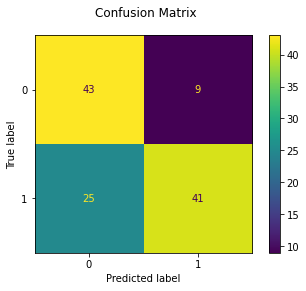

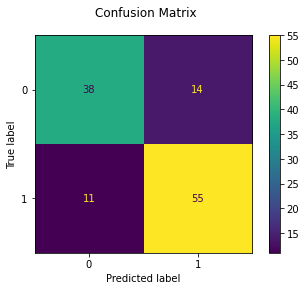

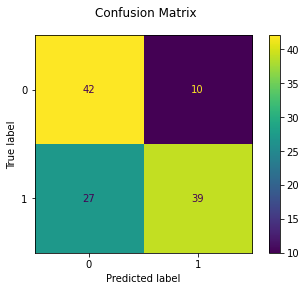

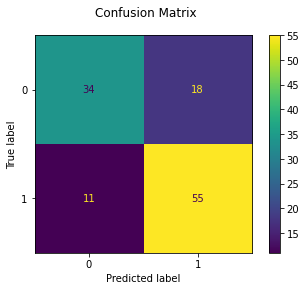

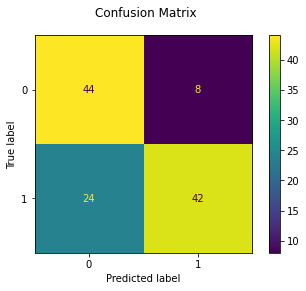

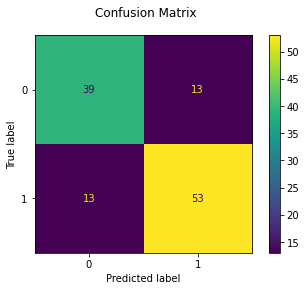

In [87]:
for clf, label in zip([clf_lr, clf_rfc,clf_nb, clf_svm, voting_clf_hard, voting_clf_soft], labels):
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    print_metrics(clf,X_test,y_test,prediction)

Caso vc nao queira rodar tudo de novo, pode dar ctrl c+v nos grids e recuperar os melhores modelos assim:

In [88]:
# https://stackoverflow.com/questions/33110973/pass-a-dict-to-scikit-learn-estimator
grid_rfc={'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

clf_rfc=RandomForestClassifier(**grid_rfc)

grid_svm={'svc__shrinking': False,
 'svc__probability': True,
 'svc__kernel': 'rbf',
 'svc__gamma': 'auto',
 'svc__decision_function_shape': 'ovo',
 'svc__class_weight': None,
 'svc__C': 0.1}

clf_svm = make_pipeline(StandardScaler(), SVC())
clf_svm.set_params(**grid_svm)

grid_nb={'var_smoothing': 0.1}
clf_nb=GaussianNB(var_smoothing= 0.1)

grid_lr={'warm_start': True, 'n_jobs': -1, 'multi_class': 'multinomial', 'C': 0.39}
clf_lr=LogisticRegression(**grid_lr)